In [1]:
from compare_rules import generic_set_intersection, \
    fast_list_intersection, mrs_txs_interseccion_lev_1, \
    mrs_txs_frecuencia_mayor_set, mrs_txs_frecuencia_mayor_list

from info_rules import all_mrs_from_transactions

import analysis_utils as autils

from typing import Dict, List, Tuple

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from plot_utils import set_spanish_locale, format_mil_spanish, matplot_formatter_mil_spanish, \
    plot_histogram_mrs_support_count

set_spanish_locale()

sns.set_style("whitegrid")
sns.set_context("notebook")

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]= (8, 6)

In [3]:
# Quiero comparar los MRs en distintas familias.
# Para eso uso las CLEAN transactions, que son las que se le pasan a las reglas
# Tengo pendiente entender mejor cual es la diferencia entre las clean y las originales

In [4]:
transactions_newank = autils.read_clean_transactions("NEWAnk_len4_ALL_sub", "output/clean_transactions")

In [5]:
transactions_newank_uniform = autils.read_clean_transactions("NEWAnk_UNIFORM_len4_ALL_sub", "output/clean_transactions")

In [6]:
transactions_newank_scram = autils.read_clean_transactions("NEWAnk_SCRAMBLED_len4_ALL_sub", "output/clean_transactions")

In [7]:
transactions_tpr = autils.read_clean_transactions("TPR1_len4_ALL_sub", "output/clean_transactions")

In [8]:
transactions_lrr = autils.read_clean_transactions("LRR1_len4_ALL_sub", "output/clean_transactions")

In [9]:
assert len(transactions_newank) == 32169
assert len(transactions_tpr) == 36389

In [10]:
print("Cantidad de transacciones")
print("transactions_newank:", len(transactions_newank))
print("transactions_tpr:   ", len(transactions_tpr))
print("transactions_lrr:   ", len(transactions_lrr))

Cantidad de transacciones
transactions_newank: 32169
transactions_tpr:    36389
transactions_lrr:    33060


In [11]:
# Sanity check: cada transaccion no tiene items repetidos
for idx, transaccion in enumerate([transactions_newank, transactions_tpr, transactions_lrr]):
    for tx in transaccion:
        if len(tx) != len(set(tx)):
            raise Exception("Transaccion invalida!")
    print(f"Check transactions {idx} .. OK!")

Check transactions 0 .. OK!
Check transactions 1 .. OK!
Check transactions 2 .. OK!


In [12]:
mrs_newank = all_mrs_from_transactions(transactions_newank)
mrs_newank_unique = set(mrs_newank)

In [13]:
mrs_tpr = all_mrs_from_transactions(transactions_tpr)
mrs_tpr_unique = set(mrs_tpr)

In [14]:
mrs_lrr = all_mrs_from_transactions(transactions_lrr)
mrs_lrr_unique = set(mrs_lrr)

In [15]:
# Exp0: Cuantos MRs tienen en comun

In [16]:
exp0_intersection = fast_list_intersection(mrs_newank, mrs_tpr)

In [17]:
print("Exp 0")
print("family_a total:     ", len(mrs_newank))
print("family_b total:     ", len(mrs_tpr))
print("result intersection:", len(exp0_intersection))

Exp 0
family_a total:      22127347
family_b total:      22389264
result intersection: 22106022


In [18]:
# ------ Combinaciones para las tres familias (totales)
# print("mrs_newank total:     ", len(mrs_newank))
# print("mrs_tpr total:     ", len(mrs_tpr))
# print("mrs_lrr total:     ", len(mrs_lrr))
# print("")
# print("intersection(mrs_newank, mrs_tpr)", 
#       len(fast_list_intersection(mrs_newank, mrs_tpr)))
# print("intersection(mrs_newank, mrs_lrr)", 
#       len(fast_list_intersection(mrs_newank, mrs_lrr)))
# print("intersection(mrs_tpr, mrs_lrr)", 
#       len(fast_list_intersection(mrs_tpr, mrs_lrr)))
# print("")
# print("intersection(mrs_newank, mrs_tpr, mrs_lrr)",
#       len(fast_list_intersection(mrs_newank, fast_list_intersection(mrs_tpr, mrs_lrr)))
#      )

In [19]:
# Exp1: Cuantos MRs unicos tienen en comun -como sets-

In [20]:
epx1_intersection = generic_set_intersection(mrs_newank_unique, mrs_tpr_unique)

In [21]:
print("Exp 1")
print("family_a uniques:   ", len(mrs_newank_unique))
print("family_b uniques:   ", len(mrs_tpr_unique))
print("result intersection:", len(epx1_intersection))

Exp 1
family_a uniques:    158107
family_b uniques:    157521
result intersection: 156340


In [22]:
# ------ Combinaciones para las tres familias (unicos)
def print_combinaciones(mrs_newank_unique, mrs_tpr_unique, mrs_lrr_unique):
    print("mrs_newank_unique:     ", format_mil_spanish(len(mrs_newank_unique)))
    print("mrs_tpr_unique:     ", format_mil_spanish(len(mrs_tpr_unique)))
    print("mrs_lrr_unique:     ", format_mil_spanish(len(mrs_lrr_unique)))
    print("")
    print("intersection(mrs_newank_unique, mrs_tpr_unique)", 
          format_mil_spanish(len(generic_set_intersection(mrs_newank_unique, mrs_tpr_unique))))
    print("intersection(mrs_newank_unique, mrs_lrr_unique)", 
          format_mil_spanish(len(generic_set_intersection(mrs_newank_unique, mrs_lrr_unique))))
    print("intersection(mrs_tpr_unique, mrs_lrr_unique)", 
          format_mil_spanish(len(generic_set_intersection(mrs_tpr_unique, mrs_lrr_unique))))
    print("")
    print("intersection(mrs_newank, mrs_tpr, mrs_lrr)",
          format_mil_spanish(len(generic_set_intersection(mrs_newank_unique, generic_set_intersection(mrs_tpr_unique, mrs_lrr_unique))))
         )

In [23]:
# TODO: Extraer a .py (latex_utils?) y agregar tests
def print_combinaciones_for_latex(mrs_newank_unique, mrs_tpr_unique, mrs_lrr_unique):
    
    mrs_newank_unique_len = len(mrs_newank_unique)
    mrs_tpr_unique_len = len(mrs_tpr_unique)
    mrs_lrr_unique_len = len(mrs_lrr_unique)
    
    intersection_mrs_newank_unique_mrs_tpr_unique = \
          len(generic_set_intersection(mrs_newank_unique, mrs_tpr_unique))
    intersection_mrs_newank_unique_mrs_lrr_unique = \
          len(generic_set_intersection(mrs_newank_unique, mrs_lrr_unique))
    intersection_mrs_tpr_unique_mrs_lrr_unique = \
          len(generic_set_intersection(mrs_tpr_unique, mrs_lrr_unique))

    intersection_mrs_newank_mrs_tpr_mrs_lrr = \
          len(generic_set_intersection(mrs_newank_unique, generic_set_intersection(mrs_tpr_unique, mrs_lrr_unique)))
         
    header = """
\\begin{table}[H]
\\begin{center}
\\begin{tabular}{|c|c|c|c|} 
 \\hline
 \\textbf{{\\newank}} & \\textbf{{\\tpr}} & \\textbf{{\\lrr}} & \\multicolumn{1}{p{6cm}|}{\\textbf{Cantidad de MRs compartidos \\newline entre las familias seleccionadas}} \\\\
"""
    content = f"""\\hline
x &   &   & {format_mil_spanish(mrs_newank_unique_len)} \\\\
 \\hline
   & x &   & {format_mil_spanish(mrs_tpr_unique_len)} \\\\
 \\hline
   &   & x & {format_mil_spanish(mrs_lrr_unique_len)} \\\\ 
 \\hline
 x & x &   & {format_mil_spanish(intersection_mrs_newank_unique_mrs_tpr_unique)} \\\\ 
 \\hline
 x &   & x & {format_mil_spanish(intersection_mrs_newank_unique_mrs_lrr_unique)} \\\\ 
 \\hline
   & x & x & {format_mil_spanish(intersection_mrs_tpr_unique_mrs_lrr_unique)} \\\\ 
 \\hline
 x & x & x & {format_mil_spanish(intersection_mrs_newank_mrs_tpr_mrs_lrr)} \\\\ 
 \\hline
 """
    footer = """
\\end{tabular}
\\caption{Cantidad de MRs en las transacciones de las familias comparables, usando {\\minlen} (((COMPLETAR))) y refinamiento \\emph{substring}. No se tiene en cuenta la cantidad de instancias. En cada fila se marca con una x aquellas familias que se tomaron para calcular la intersección.}
\\end{center}
\\end{table} 
"""
    print(header + content + footer)

In [24]:
# len_4
print_combinaciones(mrs_newank_unique, mrs_tpr_unique, mrs_lrr_unique)

mrs_newank_unique:      158.107
mrs_tpr_unique:      157.521
mrs_lrr_unique:      156.549

intersection(mrs_newank_unique, mrs_tpr_unique) 156.340
intersection(mrs_newank_unique, mrs_lrr_unique) 155.456
intersection(mrs_tpr_unique, mrs_lrr_unique) 154.910

intersection(mrs_newank, mrs_tpr, mrs_lrr) 154.157


In [25]:
# len_5

transactions_newank_len5 = autils.read_clean_transactions("NEWAnk_len5_ALL_sub", "output/clean_transactions")
transactions_tpr_len5 = autils.read_clean_transactions("TPR1_len5_ALL_sub", "output/clean_transactions")
transactions_lrr_len5 = autils.read_clean_transactions("LRR1_len5_ALL_sub", "output/clean_transactions")


mrs_newank_len5 = all_mrs_from_transactions(transactions_newank_len5)
mrs_tpr_len5 = all_mrs_from_transactions(transactions_tpr_len5)
mrs_lrr_len5 = all_mrs_from_transactions(transactions_lrr_len5)

mrs_newank_unique_len5 = set(mrs_newank_len5)
mrs_tpr_unique_len5 = set(mrs_tpr_len5)
mrs_lrr_unique_len5 = set(mrs_lrr_len5)

# Sirve de algo? experimentar
del transactions_newank_len5
del transactions_tpr_len5
del transactions_lrr_len5

In [26]:
print_combinaciones(mrs_newank_unique_len5, mrs_tpr_unique_len5, mrs_lrr_unique_len5)

mrs_newank_unique:      1.670.107
mrs_tpr_unique:      1.674.199
mrs_lrr_unique:      1.299.696

intersection(mrs_newank_unique, mrs_tpr_unique) 1.252.358
intersection(mrs_newank_unique, mrs_lrr_unique) 1.008.665
intersection(mrs_tpr_unique, mrs_lrr_unique) 996.533

intersection(mrs_newank, mrs_tpr, mrs_lrr) 861.715


In [27]:
# Exp2: Cuantos MRs unicos tienen en comun -como sets-, con distancia=1

In [28]:
exp2_intersection = mrs_txs_interseccion_lev_1(mrs_newank_unique, mrs_tpr_unique) # Usa idea de generar a priori las posibles rtas y luego revisar si en el otro set están
# La "interseccion" es mas grande y eso esta ok,
# porque cuando hay un match entre un mr y uno parecido, se agregan ambos a la bolsa de intersecciones

In [29]:
print("Exp 2")
print("family_a uniques:   ", len(mrs_newank_unique))
print("family_b uniques:   ", len(mrs_tpr_unique))
print("result intersection:", len(exp2_intersection))

Exp 2
family_a uniques:    158107
family_b uniques:    157521
result intersection: 159285


In [30]:
# Exp3: Cuantos MRs unicos tienen en comun, solo si tomo los mas frecuentes

In [31]:
#min_freq = 500    # Despues del exp6 seguramente pueda definir mejor un minimo
min_freq = 0.025*32169 # ~804 = 804,225
mrs_newank_freq = mrs_txs_frecuencia_mayor_set(min_freq, mrs_newank)
mrs_tpr_freq = mrs_txs_frecuencia_mayor_set(min_freq, mrs_tpr)
mrs_lrr_freq = mrs_txs_frecuencia_mayor_set(min_freq, mrs_lrr)
# Podria ver cuales son o simil

# top5 de cada uno. de fimlia a, de familia b y de interseccion.
# visualizar el top10

In [32]:
mrs_newank_len5_freq = mrs_txs_frecuencia_mayor_set(min_freq, mrs_newank_len5)
mrs_tpr_len5_freq = mrs_txs_frecuencia_mayor_set(min_freq, mrs_tpr_len5)
mrs_lrr_len5_freq = mrs_txs_frecuencia_mayor_set(min_freq, mrs_lrr_len5)

In [33]:
exp3_interseccion = fast_list_intersection(mrs_newank_freq, mrs_tpr_freq)

In [34]:
print("Exp 3")
print("family_a freqs:     ", len(mrs_newank_freq))
print("family_b freqs:     ", len(mrs_tpr_freq))
print("result intersection:", len(exp3_interseccion))

Exp 3
family_a freqs:      2130
family_b freqs:      2677
result intersection: 708


In [35]:
# len_4 . frequent mrs
print_combinaciones(mrs_newank_freq, mrs_tpr_freq, mrs_lrr_freq)

mrs_newank_unique:      2.130
mrs_tpr_unique:      2.677
mrs_lrr_unique:      3.759

intersection(mrs_newank_unique, mrs_tpr_unique) 708
intersection(mrs_newank_unique, mrs_lrr_unique) 485
intersection(mrs_tpr_unique, mrs_lrr_unique) 628

intersection(mrs_newank, mrs_tpr, mrs_lrr) 316


In [36]:
print_combinaciones_for_latex(mrs_newank_freq, mrs_tpr_freq, mrs_lrr_freq)


\begin{table}[H]
\begin{center}
\begin{tabular}{|c|c|c|c|} 
 \hline
 \texttt{NEWAnk} & \texttt{TPR1} & \texttt{LRR1} & \textbf{Cantidad de MRs únicos} \\ 
 \hline
x &   &   & 2.130 \\
 \hline
   & x &   & 2.677 \\
 \hline
   &   & x & 3.759 \\ 
 \hline
 x & x &   & 708 \\ 
 \hline
 x &   & x & 485 \\ 
 \hline
   & x & x & 628 \\ 
 \hline
 x & x & x & 316 \\ 
 \hline
 
\end{tabular}
\caption{\centering Cantidad de MRs únicos, ((((COMPLETAR)))). En cada fila se marca con una x aquellas que se tomaron para calcular la intersección.}
\end{center}
\end{table} 



In [37]:
# len_5 . frequent mrs
print_combinaciones(mrs_newank_len5_freq, mrs_tpr_len5_freq, mrs_lrr_len5_freq)

mrs_newank_unique:      398
mrs_tpr_unique:      133
mrs_lrr_unique:      1.136

intersection(mrs_newank_unique, mrs_tpr_unique) 1
intersection(mrs_newank_unique, mrs_lrr_unique) 1
intersection(mrs_tpr_unique, mrs_lrr_unique) 0

intersection(mrs_newank, mrs_tpr, mrs_lrr) 0


In [38]:
# Veo cuales son esas intersecciones
print(generic_set_intersection(mrs_newank_len5_freq, mrs_tpr_len5_freq))
print(generic_set_intersection(mrs_newank_len5_freq, mrs_lrr_len5_freq))

{'AAAAA'}
{'SSSSS'}


In [39]:
print_combinaciones_for_latex(mrs_newank_len5_freq, mrs_tpr_len5_freq, mrs_lrr_len5_freq)


\begin{table}[H]
\begin{center}
\begin{tabular}{|c|c|c|c|} 
 \hline
 \texttt{NEWAnk} & \texttt{TPR1} & \texttt{LRR1} & \textbf{Cantidad de MRs únicos} \\ 
 \hline
x &   &   & 398 \\
 \hline
   & x &   & 133 \\
 \hline
   &   & x & 1.136 \\ 
 \hline
 x & x &   & 1 \\ 
 \hline
 x &   & x & 1 \\ 
 \hline
   & x & x & 0 \\ 
 \hline
 x & x & x & 0 \\ 
 \hline
 
\end{tabular}
\caption{\centering Cantidad de MRs únicos, ((((COMPLETAR)))). En cada fila se marca con una x aquellas que se tomaron para calcular la intersección.}
\end{center}
\end{table} 



In [40]:
# Exp4: Cuantos MRs unicos tienen en comun, solo si tomo los mas frecuentes, con distancia=1

In [41]:
#min_freq = 500    # Despues de algun experimiento de distribucion seguramente pueda definir mejor un minimo
min_freq = 0.025*32169 # ~804
mrs_newank_freq = mrs_txs_frecuencia_mayor_set(min_freq, mrs_newank)
mrs_tpr_freq = mrs_txs_frecuencia_mayor_set(min_freq, mrs_tpr)

In [42]:
exp4_interseccion = mrs_txs_interseccion_lev_1(mrs_newank_freq, mrs_tpr_freq)

In [43]:
print("Exp 4")
print("family_a freqs:     ", len(mrs_newank_freq))
print("family_b freqs:     ", len(mrs_tpr_freq))
print("result intersection:", len(exp4_interseccion))
# La interseccion de dist=1 es bastante grande! Osea que son muy parecidos en frecuentes?

Exp 4
family_a freqs:      2130
family_b freqs:      2677
result intersection: 3524


In [44]:
# Exp5: Cuantos MRs -NO- estan en la interseccion con distancia=1, si tomo los mas frecuentes

In [45]:
mrs_newank_freq_not_intersection = (mrs_newank_freq - exp4_interseccion)
mrs_tpr_freq_not_intersection = (mrs_tpr_freq - exp4_interseccion)

exp5_not_intersection = mrs_newank_freq_not_intersection.union(mrs_tpr_freq_not_intersection)

In [46]:
print("Exp 5")
print("family_a freqs:     ", len(mrs_newank_freq))
print("family_b freqs:     ", len(mrs_tpr_freq))
print("family_a NOT intersection:     ", len(mrs_newank_freq_not_intersection))
print("family_b NOT intersection:     ", len(mrs_tpr_freq_not_intersection))
print("combined NOT intersection:     ", len(exp5_not_intersection))
# Osea, son poquitos los que no estan en la interseccion de distancia=1, tomando aquellos con mucha frecuencia

# TODO: Ver cuales son estos 230, ordenar por frecuencia
# TODO: Ver logos en pfam para saber si aparecen

Exp 5
family_a freqs:      2130
family_b freqs:      2677
family_a NOT intersection:      264
family_b NOT intersection:      311
combined NOT intersection:      575


In [47]:
# Exp6: Distribucion del largo de las transacciones (recordar que estoy usando los clean!)
# Esto es distinto al largo de las proteinas, proteinas del mismo tamaño pueden tener diferente long de transaccion
# Igual, el largo de una transaccion no deberia influir en el algoritmo (solo frecuencia de items)
#  pero es para entender mejor los datos que tengo

In [48]:
input_transaction_len = {
    "NEWAnk": transactions_newank,
    "TPR1": transactions_tpr,
    "LRR1": transactions_lrr
}

df_txs_length = autils.build_transaction_len_df(input_transaction_len)

Building transaction_len_df for NEWAnk
Building transaction_len_df for TPR1
Building transaction_len_df for LRR1


In [49]:
df_txs_length.groupby('family').describe()

tx_length                                                           
           count        mean         std   min    25%    50%    75%     max
family                                                                     
LRR1     33060.0  656.478342  334.029851  39.0  376.0  637.0  915.0  3472.0
NEWAnk   32169.0  687.846902  475.868414  34.0  339.0  557.0  920.0  6260.0
TPR1     36389.0  615.275605  358.567947  34.0  346.0  566.0  782.0  4099.0

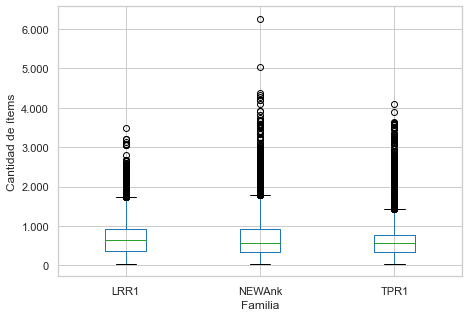

In [50]:
# Distribucion del largo de las transacciones por cada familia

# Exp repetido en notebook de kmeras, para usar refinamiento 'minimum'

ax_boxplot = df_txs_length.boxplot(
    column='tx_length', by='family', grid=True, figsize=(7, 5),
    # ,showfliers=False # Outliers
)

ax_boxplot.get_yaxis().set_major_formatter(matplot_formatter_mil_spanish())
ax_boxplot.set_ylabel('Cantidad de ítems')
ax_boxplot.set_xlabel('Familia')

plt.title("")
plt.suptitle("")

fig_tx_length_boxplot = ax_boxplot.get_figure()

# fig_tx_length_boxplot.savefig('imagenes/kmeras/transactions_mrs_length_boxplot_newank_tpr_lrr.pdf', bbox_inches = "tight")


In [51]:
# Exp7: Como es la distribucion de los largos de los mrs. Largo promedio (recordar que estoy usando los clean!)

In [52]:
input_build_mr_len = {
    "NEWAnk": mrs_newank_unique,
    "TPR1": mrs_tpr_unique,
    "LRR1": mrs_lrr_unique
}

df_mrs_length = autils.build_mr_len_df(input_build_mr_len)

Building mr_len_df for NEWAnk
Building mr_len_df for TPR1
Building mr_len_df for LRR1


<AxesSubplot:title={'center':'mr_length'}, xlabel='family'>

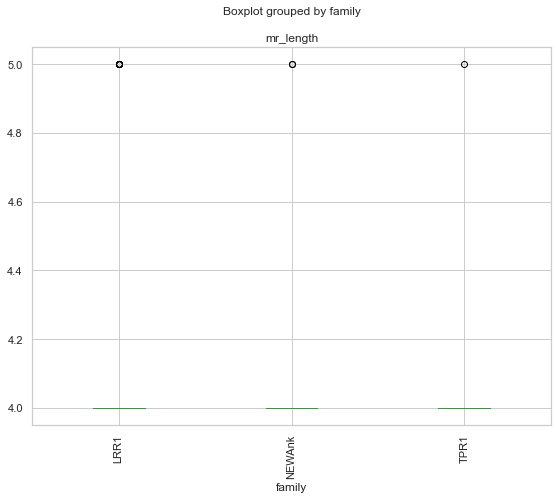

In [53]:
# Distribucion del largo de los mrs por cada familia
df_mrs_length.boxplot(column='mr_length', by='family', grid=True, rot=90, figsize=(9, 7)
     # ,showfliers=False # Outliers   
)

In [54]:
# Son todos largo 4 con algun outlier en 5

In [55]:
# Exp8: Cuantos exactamente de largo 4 y largo 5 hay en cada familia

In [56]:

def show_mr_length_stats(length, family):
    # families = ["NEWAnk", "TPR1", "LRR1"]
    transactions_len = autils.read_clean_transactions(f"{family}_len{length}_ALL_sub", "output/clean_transactions")
    mrs_len = all_mrs_from_transactions(transactions_len)
    mrs_unique_len = set(mrs_len)

    df_mrs_length = autils.build_mr_len_df({family: mrs_unique_len})

    stats = df_mrs_length.groupby(['family', 'mr_length']
                                 ).agg({'mr_length': 'count'}
                                 ).rename(columns={'mr_length': 'count'}
                                 ).reset_index()

    print(f"Stats for {family}. Length {length}")
    return stats


In [57]:
df_stats_len_4 = show_mr_length_stats(4, "NEWAnk")
df_stats_len_4

Building mr_len_df for NEWAnk
Stats for NEWAnk. Length 4


,family,mr_length,count
0,NEWAnk,4,158105
1,NEWAnk,5,2


In [58]:
# df_stats_len_4.plot(kind='bar')

In [59]:
show_mr_length_stats(5, "NEWAnk")

Building mr_len_df for NEWAnk
Stats for NEWAnk. Length 5


,family,mr_length,count
0,NEWAnk,5,1666141
1,NEWAnk,6,3760
2,NEWAnk,7,174
3,NEWAnk,8,28
4,NEWAnk,9,2
5,NEWAnk,10,2


In [60]:
df_stats_len6 = show_mr_length_stats(6, "NEWAnk")
df_stats_len6

Building mr_len_df for NEWAnk
Stats for NEWAnk. Length 6


,family,mr_length,count
0,NEWAnk,6,1855589
1,NEWAnk,7,50884
2,NEWAnk,8,7269
3,NEWAnk,9,2445
4,NEWAnk,10,1110
5,NEWAnk,11,468
6,NEWAnk,12,247
7,NEWAnk,13,142
8,NEWAnk,14,70
9,NEWAnk,15,54


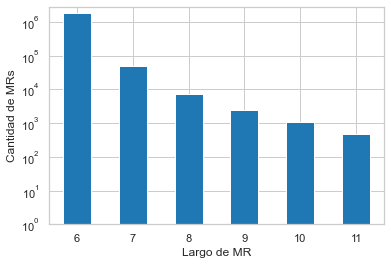

In [67]:
# Escala LOG
ax = df_stats_len6[df_stats_len6.mr_length <= 11].plot(
    kind='bar', x='mr_length', y='count', logy=True, legend=False, rot=0)

ax.set_ylim(1, )
ax.set_xlabel("Largo de MR")
ax.set_ylabel("Cantidad de MRs")
df_stats_len6_figure = ax.get_figure()
# df_stats_len6_figure.savefig('imagenes/minlen/longitud_mr_minimo_6_log.pdf', bbox_inches = "tight")

In [62]:
df_stats_len7 = show_mr_length_stats(7, "NEWAnk")
df_stats_len7

Building mr_len_df for NEWAnk
Stats for NEWAnk. Length 7


,family,mr_length,count
0,NEWAnk,7,603460
1,NEWAnk,8,60037
2,NEWAnk,9,18538
3,NEWAnk,10,8488
4,NEWAnk,11,4580
...,...,...,...
62,NEWAnk,88,1
63,NEWAnk,95,1
64,NEWAnk,97,1
65,NEWAnk,101,1


<AxesSubplot:xlabel='mr_length'>

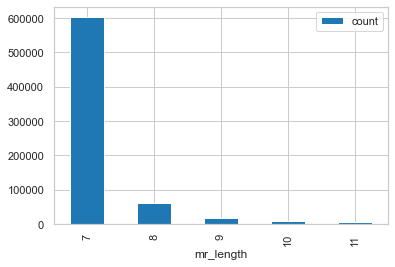

In [63]:
df_stats_len7[df_stats_len7.mr_length <= 11].plot(kind='bar', x='mr_length', y='count')

In [64]:
df_stats_len8 = show_mr_length_stats(8, "NEWAnk")
df_stats_len8

Building mr_len_df for NEWAnk
Stats for NEWAnk. Length 8


,family,mr_length,count
0,NEWAnk,8,298552
1,NEWAnk,9,53155
2,NEWAnk,10,21320
3,NEWAnk,11,10541
4,NEWAnk,12,6180
...,...,...,...
134,NEWAnk,433,1
135,NEWAnk,436,1
136,NEWAnk,441,1
137,NEWAnk,474,1


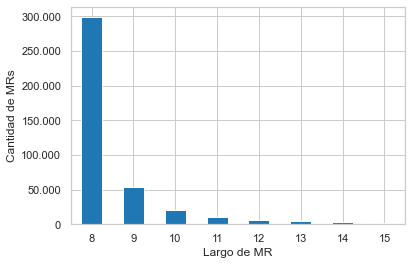

In [68]:
ax = df_stats_len8[df_stats_len8.mr_length <= 15].plot(
    kind='bar', x='mr_length', y='count', logy=False, legend=False, rot=0)

# ax.set_ylim(1, )  # Solo si uso logaritmica
ax.set_xlabel("Largo de MR")
ax.set_ylabel("Cantidad de MRs")
ax.get_yaxis().set_major_formatter(matplot_formatter_mil_spanish())
df_stats_len8_fig = ax.get_figure()
# df_stats_len8_fig.savefig('imagenes/minlen/longitud_mr_minimo_8.pdf', bbox_inches = "tight")

In [66]:
df_mrs_length.groupby(['family', 'mr_length']).agg({'mr_length': 'count'})
# Podemos suponer todos de largo 4. Por que? Esto es por lo de clean_transactions

mr_length
family mr_length           
LRR1   4             156543
       5                  6
NEWAnk 4             158105
       5                  2
TPR1   4             157520
       5                  1

In [67]:
# ABCDE, ABCD   ->   ABCD   ||||      ABCDE -> ABCD --  

#  Ver quienes son esas 6,2,1  (son www, yyy ?? )
#  TODO: Probar sin hacer ningun filtro de subtring/superstring. Como cambian las reglas
#  TODO: Probar hacer un filtro dejando solo los de longitud 5

In [68]:
# Exp9: Como es la distribucion de la frecuencia de los MRs. 
# ¿Puede ser que en una familia todas las apariciones estan concentradas en unos pocos mrs?

In [69]:
input_build_mr_tx_frequency = {
    "NEWAnk": transactions_newank,
    "TPR1": transactions_tpr,
    "LRR1": transactions_lrr
}

df_freq_data = autils.build_mr_tx_frequency_df(input_build_mr_tx_frequency)

Building mr_tx_frequency for NEWAnk
 .... freq_count .... 0/32169
 .... freq_count .... 10000/32169
 .... freq_count .... 20000/32169
 .... freq_count .... 30000/32169
Building mr_tx_frequency for TPR1
 .... freq_count .... 0/36389
 .... freq_count .... 10000/36389
 .... freq_count .... 20000/36389
 .... freq_count .... 30000/36389
Building mr_tx_frequency for LRR1
 .... freq_count .... 0/33060
 .... freq_count .... 10000/33060
 .... freq_count .... 20000/33060
 .... freq_count .... 30000/33060
Finished


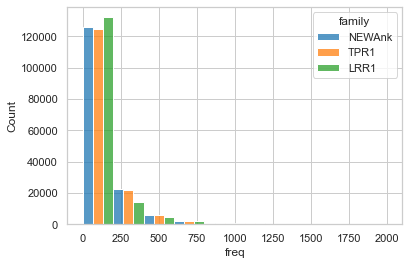

In [70]:
sns.histplot(df_freq_data, x='freq', hue='family', multiple='dodge', bins=10, binrange=(0, 2000));
# Esto no está bien, 
#  no quiero ver exactamente la frecuencia, quiero ver el % de apariciones en relacion a la cant de txs 

In [71]:
# Primeras conclusiones

# LRR1 tiene muchos MRs que tienen alta frecuencia
# min_support: 0.025
# transactions_lrr:    33060

# Para ser considereda en una regla, el item tiene que tener mas de: 826 apariciones

# Para LRR1 vemos que tiene muchos MRs con mas de 826 apariciones, por lo que son considerados en el minssuport,
#  por lo que tiene sentido que se terminen generando mas reglas

# ---------
# Ahora, lo que NO entiendo, es por que TPR genera muchas MENOS reglas que NEWAnk,
#  pero teniendo mas items con mayor o igual frecuencia   ¿?  (rta -> tiene que ver con frecuencia de pares)

In [72]:
# Exp10: Igual que lo anterior pero usando % en el eje X
# X = 0-100% de proteinas [txs]  -> frecuencia?
# Y = cuantos items hay que aparecen en ese % de proteinas [txs] == cuantos items con esa frecuencia


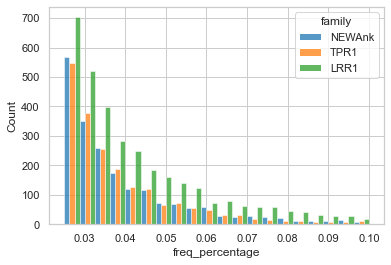

In [73]:
sns.histplot(df_freq_data, x='freq_percentage', hue='family', multiple='dodge', bins=20, binrange=(0.025, 0.1));
# TODO: Marcar recta vertical

Text(0.5, 1.0, 'Cantidad de MRs presente para una frecuencia dada')

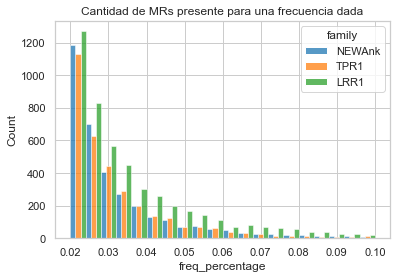

In [74]:
plot_exp10 = sns.histplot(df_freq_data, 
                          x='freq_percentage', 
                          hue='family', 
                          multiple='dodge', 
                          bins=20, 
                          binrange=(0.02, 0.1));
fig = plot_exp10.get_figure()
plt.title("Cantidad de MRs presente para una frecuencia dada")
# plt.axvline(x=0.025, color='red')
# fig.savefig('imagenes/single_freq_percentage_count_exp10.pdf', bbox_inches = "tight")

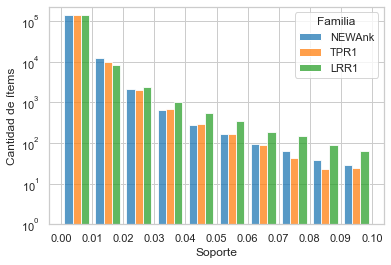

In [99]:
fig = plot_histogram_mrs_support_count(df_freq_data, 0.0, 0.1, 10, vline=None, ylabel="Cantidad de ítems")
# fig.savefig('imagenes/frecuencias/single_freq_percentage_count.pdf', bbox_inches = "tight")

In [78]:
input_build_mr_tx_frequency_control = {
    "NEWAnk_UNIFORM": transactions_newank_uniform,
    "NEWAnk_SCRAMBLED": transactions_newank_scram,
    "NEWAnk": transactions_newank,
}

df_freq_data_control = autils.build_mr_tx_frequency_df(input_build_mr_tx_frequency_control)

Building mr_tx_frequency for NEWAnk_UNIFORM
 .... freq_count .... 0/32169
 .... freq_count .... 10000/32169
 .... freq_count .... 20000/32169
 .... freq_count .... 30000/32169
Building mr_tx_frequency for NEWAnk_SCRAMBLED
 .... freq_count .... 0/32169
 .... freq_count .... 10000/32169
 .... freq_count .... 20000/32169
 .... freq_count .... 30000/32169
Building mr_tx_frequency for NEWAnk
 .... freq_count .... 0/32169
 .... freq_count .... 10000/32169
 .... freq_count .... 20000/32169
 .... freq_count .... 30000/32169
Finished


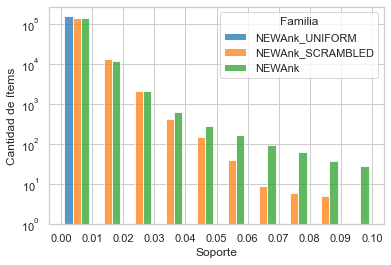

In [98]:
fig = plot_histogram_mrs_support_count(df_freq_data_control, 0.0, 0.1, 10, vline=None, ylabel="Cantidad de ítems")
# fig.savefig('imagenes/frecuencias/single_freq_percentage_count_control.pdf', bbox_inches = "tight")

In [80]:
# Parece tener consistente que superando el umbral del min_support, NEWAnk tenga mas items 
#  con frecuencia alta en comparacion con TPR1, que deja de aparecer.

# No me queda claro que la diferencia sea tanta como para que NEWAnk genere 4000 y TPR genere 4

In [81]:
# Si me quedo solo con los items que superan el min_support, aca se nota mejor como LRR1 gana.
# Entre TPR y NEWAnk no me queda claro, pero para generar una regla necesito 2 items. Pruebo pares.

In [82]:
# Exp10: En vez de considerar items solos, considerar pares de items.
#  Para que no explote, tomo solo los items que superan el min_support
min_support = 0.025
df_freq_data_step1 = df_freq_data[df_freq_data.freq_percentage > min_support]

In [83]:
df_freq_data_step1.head()

,family,mr,freq,freq_percentage
0,NEWAnk,AAAE,2246,0.069819
2,NEWAnk,AAEG,1627,0.050577
3,NEWAnk,AAGA,3168,0.098480
5,NEWAnk,AAGL,1439,0.044733
6,NEWAnk,AALA,1993,0.061954


In [84]:
frequent_mrs_by_family = autils.build_frequent_mrs_by_family(df_freq_data, min_support)
    
print(len(frequent_mrs_by_family['NEWAnk']))
print(len(frequent_mrs_by_family['TPR1']))
print(len(frequent_mrs_by_family['LRR1']))

build_pairs_mr_tx_frequency_df, min_support: 0.025
Filtering mrs to get most frequents only
2130
2051
3610


In [85]:
print(len(transactions_newank))
for i, tx in enumerate(transactions_newank):
    if len(tx) > 5000:
        print(i)
        
# Tengo transacciones con mas de 5000 MRs. No es raro?

32169
1092
14366


In [86]:
transactions_frequents_test = autils.get_transactions_with_frequents(frequent_mrs_by_family["NEWAnk"], transactions_newank)
pd.DataFrame({"lens": [ len(tx) for tx in transactions_frequents_test]}).describe()
# Largo promedio es 100. Va a estar ok!

,lens
count,32169.000000
mean,97.637508
std,46.476257
min,11.000000
25%,64.000000
50%,88.000000
75%,121.000000
max,703.000000


In [87]:
input_build_pairs_mr_tx_frequency = {
    "NEWAnk": transactions_newank,
    "TPR1": transactions_tpr,
    "LRR1": transactions_lrr
}

min_support = 0.025
df_freq_pairs_data = autils.build_pairs_mr_tx_frequency_df(
    input_build_pairs_mr_tx_frequency, df_freq_data, min_support)

build_pairs_mr_tx_frequency_df, min_support: 0.025
Filtering mrs to get most frequents only
Building freqs_by_pair_combinations for NEWAnk...
Filtering transactions_frequents
 .... 0/32169
 .... 5000/32169
 .... 10000/32169
 .... 15000/32169
 .... 20000/32169
 .... 25000/32169
 .... 30000/32169
Building freqs_by_pair_data for NEWAnk...
NEWAnk ready.
Building freqs_by_pair_combinations for TPR1...
Filtering transactions_frequents
 .... 0/36389
 .... 5000/36389
 .... 10000/36389
 .... 15000/36389
 .... 20000/36389
 .... 25000/36389
 .... 30000/36389
 .... 35000/36389
Building freqs_by_pair_data for TPR1...
TPR1 ready.
Building freqs_by_pair_combinations for LRR1...
Filtering transactions_frequents
 .... 0/33060
 .... 5000/33060
 .... 10000/33060
 .... 15000/33060
 .... 20000/33060
 .... 25000/33060
 .... 30000/33060
Building freqs_by_pair_data for LRR1...
LRR1 ready.
Building DataFrame


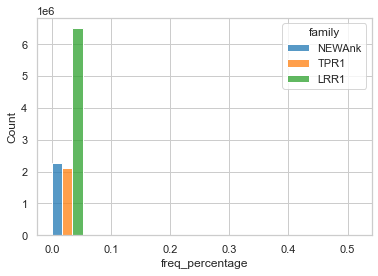

In [88]:
sns.histplot(df_freq_pairs_data, x='freq_percentage', hue='family', multiple='dodge', bins=10);

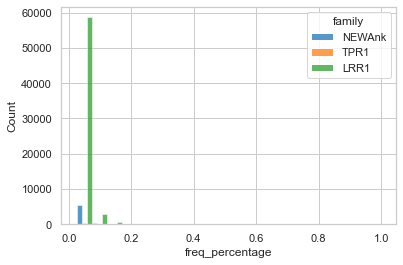

In [89]:
# Estos son los que superan el min_support
sns.histplot(df_freq_pairs_data, x='freq_percentage', hue='family', 
             multiple='dodge', bins=20, binrange=(0.025, 1));

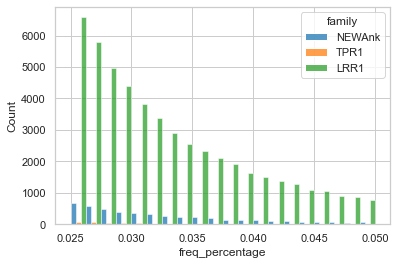

In [90]:
# Estos son los que superan el min_support
sns.histplot(df_freq_pairs_data, x='freq_percentage', hue='family', 
             multiple='dodge', bins=20, binrange=(0.025, 0.05));

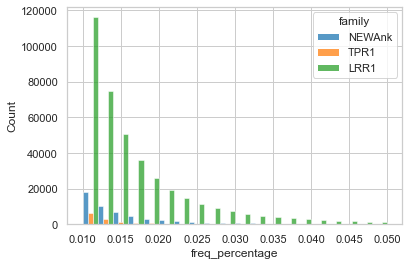

In [91]:
sns.histplot(df_freq_pairs_data, x='freq_percentage', hue='family', 
             multiple='dodge', bins=20, binrange=(0.010, 0.05));

#  Ver cuanto deberia mover el min_supoort a la izquierda o a la derecha
# con las otras familias, para obtener una cant de reglas parecidas que NEWAnk

# Para hacer algo automatico hay que tener en cuenta tambien lo de largo 1

In [92]:
# Aca se nota bastante la diferencia entre las familias, y se explica la diferencia de reglas
# Para generar una regla se necesita (al menos) dos elementos, asi que este es el grafico de elems usados en reglas

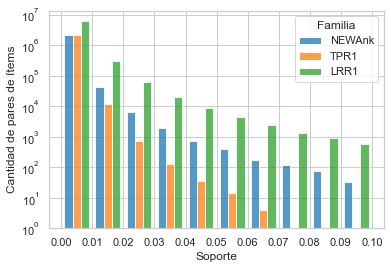

In [97]:
fig = plot_histogram_mrs_support_count(df_freq_pairs_data, 0.0, 0.1, 10, vline=None, ylabel="Cantidad de pares de ítems")
# fig.savefig('imagenes/frecuencias/pairs_freq_percentage_count.pdf', bbox_inches = "tight")

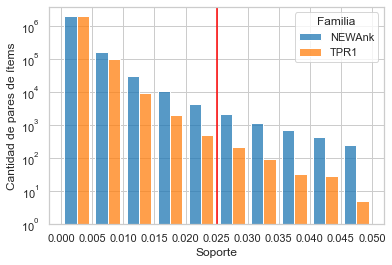

In [103]:
# Para seccion de prediccion de reglas.
df_freq_pairs_data_newank_tpr1 = df_freq_pairs_data[df_freq_pairs_data.family.isin(["NEWAnk", "TPR1"])]
fig = plot_histogram_mrs_support_count(df_freq_pairs_data_newank_tpr1, 0.000, 0.05, 10, logy=True, vline=0.025, ylabel="Cantidad de pares de ítems")
# fig.savefig('imagenes/frecuencias/pair_freq_percentage_count_newank_tpr1_len4.pdf', bbox_inches = "tight")